# Agente viajero

## Importación de librerias

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt

## Generación de las coordenadas

In [ ]:
# Generate pseudo-random points using the Blum Blum Shub algorithm
def blum_blum_shub(m, seed, quantity):
    numbers = []
    x_coordinates = []
    y_coordinates = []

    for i in range(quantity):
        seed = (seed**2) % m
        random_x = seed / m
        seed = (seed**2) % m
        random_y = seed / m

        numbers.append((random_x, random_y))
        x_coordinates.append(random_x)
        y_coordinates.append(random_y)

    return numbers, x_coordinates, y_coordinates

# Generate the initial number using the Blum Blum Shub algorithm
def blum_blum_shub_choice(m, seed):
    seed = (seed**2) % m
    choice = seed % 10  # Generate a number from 0 to 9
    return choice

## Cálculo de distancias

In [ ]:
# Function to calculate the Euclidean distance between two points
# Receives two points
# Returns the square root of the sum of the squared differences in x and y
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


In [ ]:
# Function to calculate the total distance of the route
# Receives the route and the points
# Returns the total distance of the route
def total_distance(route, points):
    distance = 0
    for i in range(len(route) - 1):
        distance += euclidean_distance(points[route[i]], points[route[i + 1]])
    return distance


## Algoritmo de resolución

In [3]:
# Function to solve the Traveling Salesman Problem using brute-force
# Receives the points
# Returns the best route along with its corresponding total distance
def traveling_salesman(points):
    n = len(points)
    best_route = None
    best_distance = float('inf')

    # Generate all permutations of the indices of the points
    indices = list(range(n))
    permutations = itertools.permutations(indices)

    # Select a random initial number using the Blum Blum Shub algorithm
    m = 991
    seed = 123456789
    initial_number = blum_blum_shub_choice(m, seed)

    print("The initial number is:", initial_number)
    permutations_with_initial_number = []

    for perm in permutations:
        if perm[0] == initial_number:
            permutations_with_initial_number.append(perm)

    for route in permutations_with_initial_number:
        distance = total_distance(route, points)
        if distance < best_distance:
            best_distance = distance
            best_route = route

    return best_route, best_distance

## Graficar distancias entre los puntos

In [4]:
# Function to display the distances between points
def show_distances_between_points(points):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'orange', 'purple']
    plt.figure(figsize=(12, 6))

    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            distance = euclidean_distance(points[i], points[j])
            plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'b--', color=colors[i])
            plt.text((points[i][0] + points[j][0]) / 2, (points[i][1] + points[j][1]) / 2, f'{distance:.2f}', color='#5D190A')

    plt.scatter(x, y, c='b', label='Points')

    for i, point in enumerate(points):
        plt.annotate(str(i), point, textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title('Points with Distances')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

## Implementación 

The initial number is: 1
Order of the route: (1, 5, 0, 7, 6, 2, 4, 8, 3, 9)


C:\Users\panch\AppData\Local\Temp\ipykernel_7472\3820633407.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]], 'b--', color=colors[i])


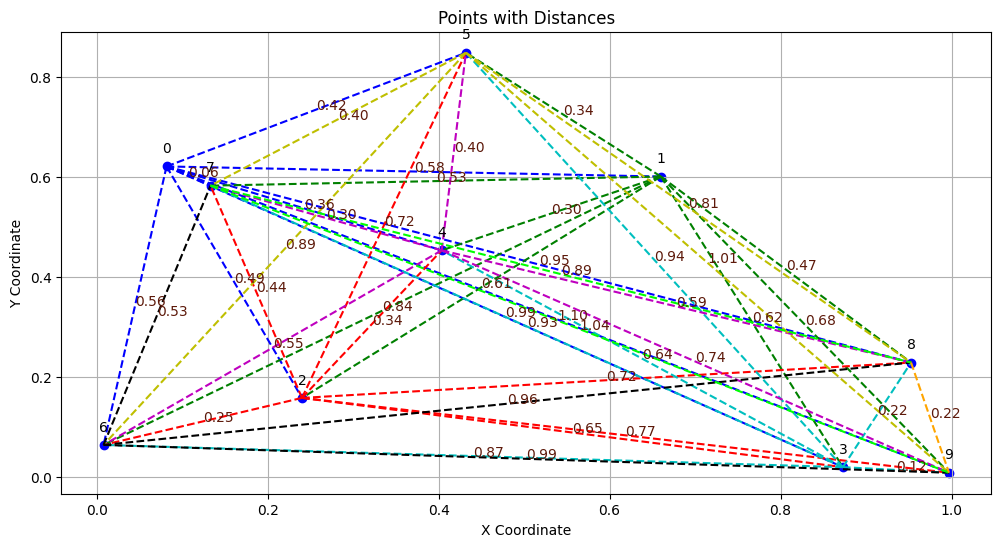

In [6]:
#------------------------- IMPLEMENTATION -----------------------------------#
m = 991
seed = 123456789
num_points = 10

# Generate pseudo-random points
random_numbers, x, y = blum_blum_shub(m, seed, num_points)
points = list(zip(x, y))


# Solve the Traveling Salesman Problem and get the best route and distance
best_route, best_distance = traveling_salesman(points)

# Print the order of the best route
print(f'Order of the route: {best_route}')

# Display the graph with all distances between points
show_distances_between_points(points)


### Graficar la mejor ruta

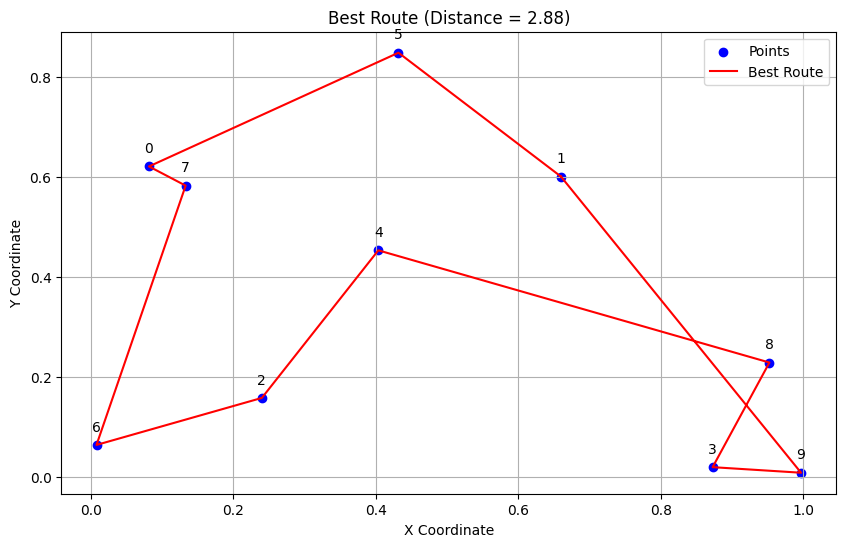

In [5]:
# Plot the best possible route
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='b', label='Points')

for i, point in enumerate(points):
    plt.annotate(str(i), point, textcoords="offset points", xytext=(0, 10), ha='center')

route_x = [x[i] for i in best_route]
route_y = [y[i] for i in best_route]
route_x.append(route_x[0])
route_y.append(route_y[0])

plt.plot(route_x, route_y, c='r', label='Best Route')
plt.legend()
plt.title(f'Best Route (Distance = {best_distance:.2f})')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

